# Defining the Game: Tic-Tac-Toe

## The Search Problem

A general search problem is defined in the following way:

* **Initial State:** Empty $3 \times 3$ board. It is the move for $x$.
* **Actions:** Place your symbol on any empty square.
* **Transition function:** You symbol is placed on the board according to the action. The opponent
    places her symbol. From our viewpoint this makes the environment non-deterministic.
* **Goal state:** A win (three symbols in a row, column or diagonal). 
* **Path cost:** number of moves.
  
Since Tic-tac-toe is a game, we will use the more specializes components (see Chapter 5):
* `Actions(s)` Legal moves in state s.
* `Result(s, a)` Transition model.
* `Terminal(s)` Test for terminal states.
* `Utility(s)` Utility for player Max for terminal states.

**Notes:**

* To define the goal state we will use a test for a **terminal state** (game is over) and a **utility function** (win or loose). 
* We will use DFS which is not optimal. So will probably not find the solution with the lowest path cost, i.e., win with the smallest number of moves. Therefore, we drop the path cost all together.

## Problem Size

### State Space Estimates

Each state is a possible board. Each of the 9 squares can have 3 values (empty, x and o), but some boards are impossible (where a player has several sequences of 3).The number of states in the state space graph is less than $3^9$.

In [15]:
3**9

19683

A tighter bound for the search space size would be looking at all the ways we can choose $i = 1,2,3,...,9$ places from the board given by ${9 \choose i}$. Now we need to find all ways how we can choose half the symbols for player o which is given by ${i \choose \lfloor \frac{i}{2} \rfloor}$. 
Put together we get $\sum_{i=1}^9{{9 \choose i}{i \choose \lfloor \frac{i}{2} \rfloor}}$.

In [16]:
import math

print("level\tboards")
sum = 0

for i in range(1,9):
    sum += math.comb(9, i) * math.comb(i, math.floor(i/2))
    print(i, "\t", math.comb(9, i) , " x ", math.comb(i, math.floor(i/2)) , " = ",  math.comb(9, i) * math.comb(i, math.floor(i/2)))

sum

level	boards
1 	 9  x  1  =  9
2 	 36  x  2  =  72
3 	 84  x  3  =  252
4 	 126  x  6  =  756
5 	 126  x  10  =  1260
6 	 84  x  20  =  1680
7 	 36  x  35  =  1260
8 	 9  x  70  =  630


5919

This is an upper bound since it contains some infeasible boards where both players have 3 in a row.

### Space and Time Complexity Using the Search Tree Estimates

For solving the problem, we use the search tree which can be significantly larger than the state space.
A search tree is a subgraph with all **cycles removed.** The standard implementation of DFS **cannot remove redundant paths** (i.e., getting to the same board by plcing symbols in a different order). Therefore, a state can be represented by several nodes in different branches! We observe the following:

* The complete search tree has a maximal depth $m=9$
* The max branching factor $b=9$ (for first move).

DFS has

* a space complexity of $O(bm)$ (current path plus frontier) and 
* a time complecity of $O(b^m)$ (number of expanded nodes).

In [17]:
# Space Complexity O(bm):
9*9

81

In [18]:
# Time Complexity O(b^m): 
9**9

387420489

The branching factor decreases after each move. The first level has a branching factor of 9, the second a branching factor of 8, etc. The total number of nodes is:

| <div style="width:100px">Level</div>      |  <div style="width:200px"># of nodes</div>   |
| :------------- | :---------------- |
| root       | $1$ |
| level 1    | $9 = 9!/8!$ |
| level 2    | $9 \times 8 = 9!/7!$ |
| level 2    | $9 \times 8 \times 7 = 9!/6!$ |
| ...        |  ... |
| level 9    | $9 \times 8 \times \dots \times 2 \times 1 = 9!$ |

The total number of game tree nodes is less (some games end early) than the sum of the nodes above. The upper bound for the number of nodes is

$\sum_{i = 0}^9 \frac{9!}{i!}$

In [19]:
sum = 1
partial_fac = 1
print("level\t# nodes")
print("root\t 1")

for i in range(9, 0, -1):
    partial_fac *= i
    sum += partial_fac 
    print(10-i, "\t", partial_fac)
    
sum

level	# nodes
root	 1
1 	 9
2 	 72
3 	 504
4 	 3024
5 	 15120
6 	 60480
7 	 181440
8 	 362880
9 	 362880


986410

Since some sequences are cut short because of a win, we expect fewer nodes in the game complete tree.

**Redundant paths:** The tree size estimation contains redundant paths.

**Cycles:** Tic-tac-toe does not have cycles (you cannot remove a played symbol).


__Note:__ This size makes tic-tac-toe a very small problem that can be easily solved by tree search. Most games and real problems are too large and cannot be solved this way. For example, chess has an estimated state space size of $>10^{30}$. 
We will learn several methods that address this problem later.

## Implementation

We need to implement the following functions:

* `Actions(s)` Legal moves in state s.
* `Result(s, a)` Transition model.
* `Terminal(s)` Test for terminal states.
* `Utility(s)` Utility for player Max for terminal states.

The state (a board position) will be implemented as a vector (in Python this is a list) of length 9. The values are `' ', 'x', 'o'`. The actions are just the index in the list (0, 1, 2, ..., 8).


The implementation of these and some other helper functions can be found in [tictactoe.py](tictactoe.py)
and be imported from that file

In [20]:
from tictactoe import empty_board, actions, result, terminal, utility
from tictactoe import show_board, show_board_text

## Examples

In [21]:
board = empty_board()
board[0] = 'x'; board[3] = 'x'; board[6] = 'x'; board[1] = 'o'; board[4] = 'o'  
display(board)

['x', 'o', ' ', 'x', 'o', ' ', 'x', ' ', ' ']

In [22]:
show_board_text(board)

[['x' 'o' ' ']
 ['x' 'o' ' ']
 ['x' ' ' ' ']]


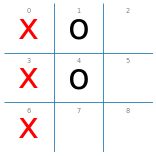

In [23]:
show_board(board)

In [24]:
actions(board)

[2, 5, 7, 8]

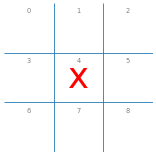

In [25]:
board2 = empty_board()
board2 = result(board2, 'x', 4)
show_board(board2)

In [26]:
print(terminal(board))
print(terminal(board2))

True
False


## Experiments


### Baseline: Randomized Player

A completely randomized player agent can be used as a weak baseline. A simple random agent and a the game environment
are implemented in [tictactoe.py](tictactoe.py) as `random_player()` and `play()`, respectively.

In [27]:
from tictactoe import random_player, play 

### Random vs. Random

Let a random player play another random player for 100 games and look at the number of wins.

In [28]:
%time display(play(random_player, random_player, N = 100))

{'x': 68, 'o': 24, 'd': 8}

CPU times: user 80.9 ms, sys: 76.7 ms, total: 158 ms
Wall time: 51.8 ms


_Note:_ It looks like the first player (x) has an advantage!